In [2]:
import xarray as xr
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
from matplotlib import rcParams #For changing text properties
import cmocean #A package with beautiful colormaps
from cartopy import crs as ccrs #Useful for plotting maps
import cartopy.util #Requires separate import
from cartopy.util import add_cyclic_point
import cartopy.feature as cf
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.path as mpath
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable

### HW3 2a

In [4]:
# Read data
DIR = '/nfs/spare11/env315/data/'
datafile = DIR+'total_precip_daily_Albany.nc'
precip_A = xr.open_mfdataset(datafile).compute()
precip_A = precip_A.total_precipitation_24hr
precip_A

<xarray.DataArray 'total_precipitation_24hr' (time: 14976)> Size: 60kB
array([-1.8626451e-08, -2.6077032e-08,  2.1876767e-06, ...,
        1.0494525e-03,  3.1683547e-04,  2.3445329e-03], dtype=float32)
Coordinates:
    latitude   float32 4B 42.0
    longitude  float32 4B 286.0
  * time       (time) datetime64[ns] 120kB 1980-01-01 1980-01-02 ... 2020-12-31
Attributes:
    long_name:   Total precipitation
    short_name:  tp
    units:       m

In [5]:
# Read data
DIR = '/nfs/spare11/env315/data/'
datafile = DIR+'total_precip_daily_Mogadishu.nc'
precip_B = xr.open_mfdataset(datafile).compute()
precip_B = precip_B.total_precipitation_24hr
precip_B

<xarray.DataArray 'total_precipitation_24hr' (time: 14976)> Size: 60kB
array([2.9034866e-04, 3.9092265e-06, 0.0000000e+00, ..., 7.2385650e-05,
       4.2117713e-04, 3.2091141e-04], dtype=float32)
Coordinates:
    latitude   float32 4B 2.0
    longitude  float32 4B 45.0
  * time       (time) datetime64[ns] 120kB 1980-01-01 1980-01-02 ... 2020-12-31
Attributes:
    long_name:   Total precipitation
    short_name:  tp
    units:       m

In [6]:
# daily climatology
precip_A_clim = precip_A.groupby("time.dayofyear").mean("time")
precip_B_clim = precip_B.groupby("time.dayofyear").mean("time")

# 31-day running mean
precip_A_clim_rm = precip_A_clim.rolling(dayofyear=15, center=True).mean()
precip_B_clim_rm = precip_B_clim.rolling(dayofyear=15, center=True).mean()

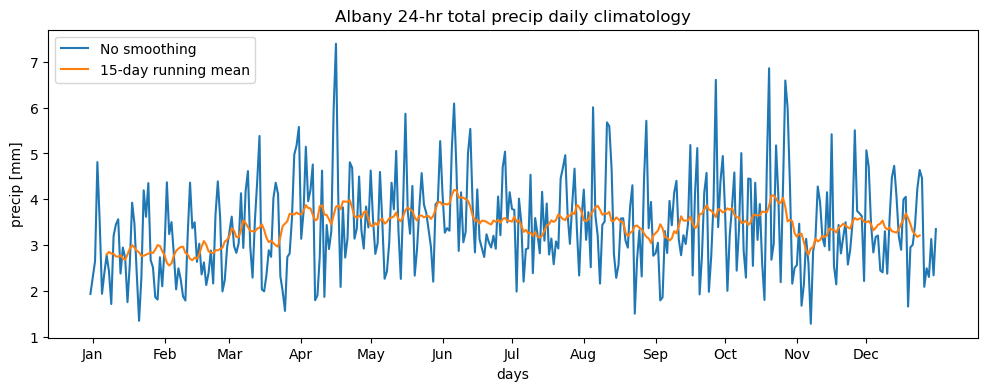

In [7]:
# plot daily climatology and its running mean for Albany
fig = plt.figure(figsize =(12, 4))
plt.plot(precip_A_clim*1000,label='No smoothing')
plt.plot(precip_A_clim_rm*1000,label='15-day running mean')
# Set x-axis tickmarks and labels
plt.xticks([1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335], 
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.xlabel('days')
plt.ylabel('precip [mm]')
plt.title('Albany 24-hr total precip daily climatology')

plt.legend()

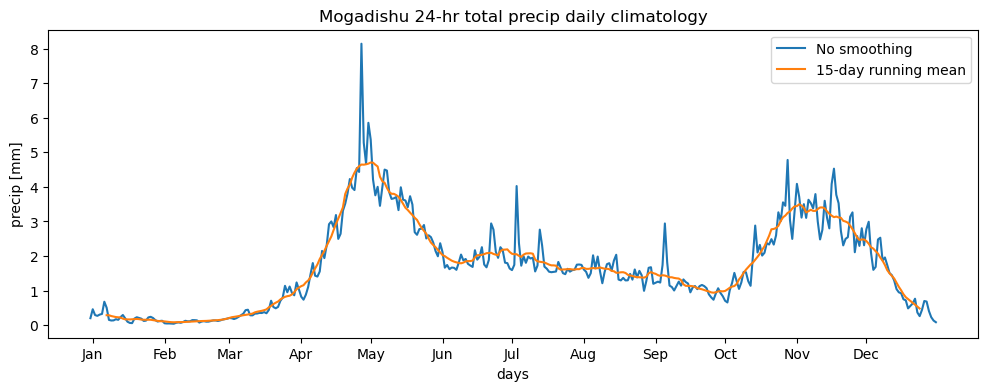

In [8]:
# plot daily climatology and its running mean for Mogadishu
fig = plt.figure(figsize =(12, 4))
plt.plot(precip_B_clim*1000,label='No smoothing')
plt.plot(precip_B_clim_rm*1000,label='15-day running mean')
# Set x-axis tickmarks and labels
plt.xticks([1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335], 
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.xlabel('days')
plt.ylabel('precip [mm]')
plt.title('Mogadishu 24-hr total precip daily climatology')

plt.legend()

### HW3 2b

In [9]:
# daily anomalies
precip_A_anom = precip_A.groupby("time.dayofyear")-precip_A_clim
precip_B_anom = precip_B.groupby("time.dayofyear")-precip_B_clim

In [10]:
# select year 2020
precip_A_anom_2020 = precip_A_anom.sel(time=precip_A_anom.time.dt.year.isin([2020]))
precip_B_anom_2020 = precip_B_anom.sel(time=precip_B_anom.time.dt.year.isin([2020]))

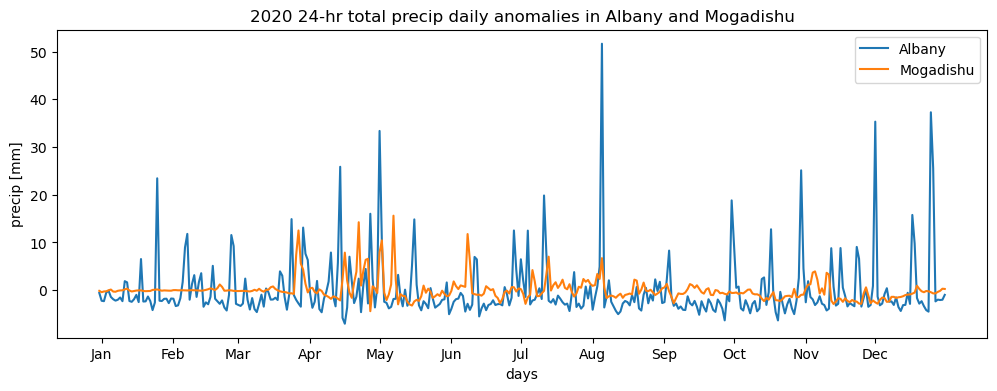

In [11]:
fig = plt.figure(figsize =(12, 4))
plt.plot(precip_A_anom_2020*1000,label='Albany')
plt.plot(precip_B_anom_2020*1000,label='Mogadishu')
# Set x-axis tickmarks and labels
plt.xticks([1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335], 
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.xlabel('days')
plt.ylabel('precip [mm]')
plt.title('2020 24-hr total precip daily anomalies in Albany and Mogadishu')

plt.legend()

### HW3 3a

In [12]:
# select daily data in March, April, May in 2019
precip_A_mam = precip_A.sel(time=precip_A.time.dt.month.isin([3,4,5]))
precip_A_mam_2019 = precip_A_mam.sel(time=precip_A_mam.time.dt.year.isin([2019]))
precip_B_mam = precip_B.sel(time=precip_B.time.dt.month.isin([3,4,5]))
precip_B_mam_2019 = precip_B_mam.sel(time=precip_B_mam.time.dt.year.isin([2019]))

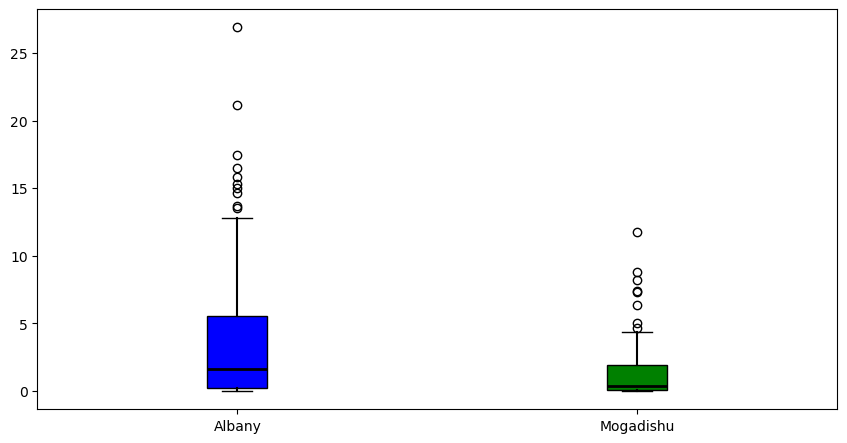

In [13]:
# boxplot
data_plot = [precip_A_mam_2019*1000,precip_B_mam_2019*1000]
fig = plt.figure(figsize =(8, 4))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

# Creating plot
bp = ax.boxplot(data_plot, patch_artist = True,
                vert = 1)

colors = ['blue', 'green']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# whiskers styles
for whisker in bp['whiskers']:
    whisker.set(color ='k',
                linewidth = 1.5,
                linestyle ="solid")

# medians styles
for median in bp['medians']:
    median.set(color ='k',
               linewidth = 2)

ax.set_xticklabels(['Albany', 'Mogadishu'])
    
# show plot
plt.show()

### HW3 3b
#### Note: students can choose to plot absolute frequency or relative frequency or probability density.
#### This example uses relative frequency by defining weights.

In [14]:
precip_A_anom_ond = precip_A_anom.sel(time=precip_A_anom.time.dt.month.isin([10,11,12]))
precip_A_anom_ond_1980 = precip_A_anom_ond.sel(time=precip_A_anom_ond.time.dt.year.isin([1980]))
precip_A_anom_ond_2018 = precip_A_anom_ond.sel(time=precip_A_anom_ond.time.dt.year.isin([2018]))

Text(0, 0.5, 'relative frequency')

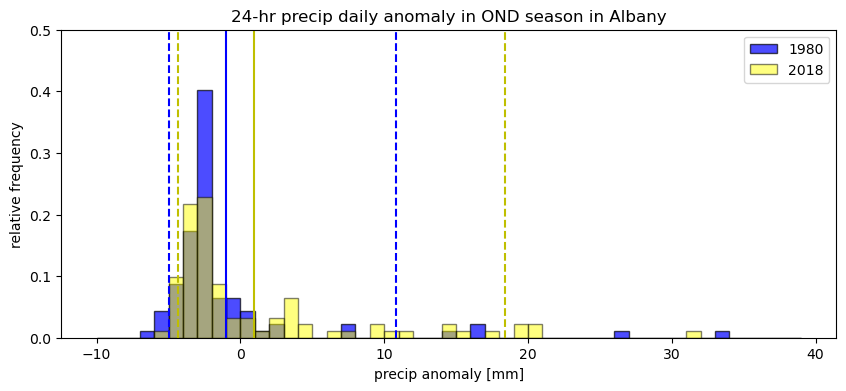

In [15]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,1,1)
weights_1 = np.ones_like(precip_A_anom_ond_1980.values) / float(len(precip_A_anom_ond_1980.values))
weights_2 = np.ones_like(precip_A_anom_ond_2018.values) / float(len(precip_A_anom_ond_2018.values))
plt.hist(precip_A_anom_ond_1980.values*1000,bins=np.arange(-10, 40, 1), weights=weights_1, edgecolor="black", color="blue", alpha = 0.7)
plt.hist(precip_A_anom_ond_2018.values*1000,bins=np.arange(-10, 40, 1), weights=weights_2, edgecolor="black", color="yellow", alpha = 0.5)
ax.legend(labels=['1980', '2018'])
plt.vlines(np.mean(precip_A_anom_ond_1980)*1000, 0, 0.5, colors='b')
plt.vlines(np.mean(precip_A_anom_ond_2018)*1000, 0, 0.5, colors='y')
plt.vlines(np.nanpercentile(precip_A_anom_ond_1980, 5)*1000, 0, 0.5, colors='b', linestyle='dashed')
plt.vlines(np.nanpercentile(precip_A_anom_ond_1980, 95)*1000, 0, 0.5, colors='b', linestyle='dashed')
plt.vlines(np.nanpercentile(precip_A_anom_ond_2018, 5)*1000, 0, 0.5, colors='y', linestyle='dashed')
plt.vlines(np.nanpercentile(precip_A_anom_ond_2018, 95)*1000, 0, 0.5, colors='y', linestyle='dashed')
plt.ylim([0, 0.5])
plt.title('24-hr precip daily anomaly in OND season in Albany')
ax.set_xlabel('precip anomaly [mm]')
ax.set_ylabel('relative frequency')